# Price optimisation project 💸

##### Project's background💡: 
##### A competitiive pricing strategy is crucial for the success and viability of businesses. Setting the 'right' price allows firms to gain a share in the market, remain attractive to customers, and ensure profitability. As an economist, we are thrived to analyze how the demand for a good is affected by a change in price. By investigating this relationship, we can identify the most effective pricing strategy that support business's long run growth. 
##### Project's overview ⭐️:
##### Perform data exploration, compare our product prices against three competitors,evaluated how our products are rated compared to competitors, perform sales trend analysis, train a regression model by using historical data to predict quantity demanded given different prices and further estimate sales and find optimal price for each product group
##### Goal 🔭: 
##### To address relevant business questions and determine the optimal price that maximise business's profitiability while ensuring a sustained position in a competitive market.
##### Data source ✨: 
##### Retail Price Optimization. (2022). SUDDHARSHAN S. Kaggle.
##### https://www.kaggle.com/datasets/suddharshan/retail-price-optimization/data


# Import relavant packages and dataset

In [254]:
!pip3 install pandas
!pip3 install numpy
!pip3 install matplotlib
!pip3 install scikit-learn
!pip3 install pandoc
import pandoc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression 


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip


In [255]:
price_df = pd.read_csv('retail_price.csv')

# Explore data

### Relevant variables
###### product_id: product
###### product_category_name: category
###### month_year: month and year
###### qty: quantity sold 
###### total_price: qty*unit_price
###### unit_price: average unit price
###### product_score: average product rating
###### comp_1: competitor1 price
###### ps1: competitor1 product rating
###### comp_2: competitor2 price
###### ps2: competitor2 product rating
###### comp_3: competitor3 price
###### ps3: competitor3 product rating

In [256]:
price_df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,1/5/2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,1/6/2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,1/7/2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,1/8/2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,1/9/2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [257]:
price_df.tail()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
671,bed5,bed_bath_table,1/5/2017,1,215.00,8.760000,215.000000,56,162,5,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,bed5,bed_bath_table,1/6/2017,10,2090.00,21.322000,209.000000,56,162,5,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,bed5,bed_bath_table,1/7/2017,59,12095.00,22.195932,205.000000,56,162,5,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,bed5,bed_bath_table,1/8/2017,52,10375.00,19.412885,199.509804,56,162,5,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000
675,bed5,bed_bath_table,1/9/2017,32,5222.36,24.324687,163.398710,56,162,5,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,199.509804


In [258]:
price_df.describe()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


In [259]:
# Check for missing values
# zero mean no missing value
price_df.isnull().sum()

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

In [260]:
# Check all columns in data
price_df.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

# Price comparison to competitors

#### Are our price lower or higher than those of our three competitors?

In [261]:
# Average prices across all products and time
print('Our average price:', price_df['unit_price'].mean())
print('Comp1 average price:', price_df['comp_1'].mean())
print('Comp2 average price:', price_df['comp_2'].mean())
print('Comp3 average price:', price_df['comp_3'].mean())


Our average price: 106.49679980991124
Comp1 average price: 79.45205397727811
Comp2 average price: 92.93007895369824
Comp3 average price: 84.18264180233729


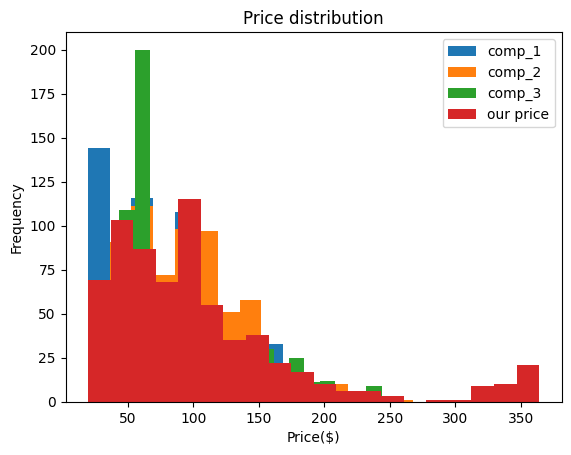

In [262]:
# Visualise our price distribution compared to competitors using histogram

comp_list = ['comp_1','comp_2','comp_3']
for comp in comp_list:
    plt.hist(price_df[comp], bins = 20, label = comp)
plt.hist(price_df['unit_price'], bins = 20, label = 'our price')

# Adding labels and title
plt.xlabel('Price($)')
plt.ylabel('Frequency')
plt.title('Price distribution')
plt.legend()

# Display the plot
plt.show()

##### The price distribution for all stores is right-skewed. The higher mean suggests that we generally price above competitors. This is likely due to several products being priced over $300.

In [263]:
# Compare the price of each product to competitors
def compare_prices(store):
    if (store['unit_price'] > store['comp_1']) and (store['unit_price'] > store['comp_2']) and (store['unit_price'] > store['comp_3']):
        return 'more expensive than all'
    elif (store['unit_price'] < store['comp_1']) and (store['unit_price'] < store['comp_2']) and (store['unit_price'] < store['comp_3']):
        return 'cheaper than all'
    else:
        return 'not too expensive or too cheap'

# Group data by product id and find the average price of each product ID
group_df = price_df.groupby('product_id')[['unit_price', 'comp_1', 'comp_2', 'comp_3']].mean().reset_index()
group_df['price_position'] = group_df.apply(compare_prices, axis=1)

group_df.tail()

,product_id,unit_price,comp_1,comp_2,comp_3,price_position
47,watches4,106.264286,119.448774,106.264286,161.470726,not too expensive or too cheap
48,watches5,213.897160,140.224191,141.275286,175.289635,more expensive than all
49,watches6,132.530461,132.530461,123.112969,169.646447,not too expensive or too cheap
50,watches7,305.690296,146.561295,165.150071,170.509696,more expensive than all
51,watches8,184.504880,133.087865,132.644286,168.418693,more expensive than all


In [264]:
# Investigate products that are more expensive than competitors
high_df = group_df[group_df['price_position'] == 'more expensive than all']
high_price_product = high_df['product_id'].unique()

print('Products that prices are more expensive: ') 
print(high_price_product) 

# Investigate products that are cheaper than competitors
low_df = group_df[group_df['price_position'] == 'cheaper than all']
low_price_product = low_df['product_id'].unique()

print('Products that prices are cheaper: ') 
print(low_price_product) 

Products that prices are more expensive: 
['cool4' 'garden1' 'garden3' 'garden5' 'garden8' 'health2' 'health3'
 'health5' 'watches5' 'watches7' 'watches8']
Products that prices are cheaper: 
['computers1' 'furniture3' 'garden2' 'watches3']


# How satisfied are customers with our products compare to that of our competitors?

In [265]:
print('Average product score: ')
print('Our product score:', price_df['product_score'].mean())
print('Comp1 product score:', price_df['ps1'].mean())
print('Comp2 product score:', price_df['ps2'].mean())
print('Comp3 product score:', price_df['ps3'].mean())

Average product score: 
Our product score: 4.085502958579881
Comp1 product score: 4.159467455621302
Comp2 product score: 4.1235207100591715
Comp3 product score: 4.002071005917159


In [266]:
print('Our product with lowest score is: ', price_df.loc[price_df['product_score'].idxmin(), 'product_id'])
print('Our product with highest score is: ', price_df.loc[price_df['product_score'].idxmax(), 'product_id'])

Our product with lowest score is:  bed3
Our product with highest score is:  health4


##### In general, customers appear to be more satisfied with our products than Competitor 3 but are less satisfied with our products when compared to Competitor 1 and Competitor 2. 
##### To improve product score rating, my recommendations would be to conduct a thorough review of both positive and negative customers feedbacks. Insights from these feedbacks should be discussed with the production team or other associated team to improve product that better align with customers' need and expectations. 
##### For bed3, which has thelowest score, we should investigate potential issues such as poor quality, usability challenge, or an unattracttive design. Based on this investigation, we can determine if redesign or further product development is neccessary.

# Sales over time 

#### How do sales change over time?
#### Do seasonality affect sales?

0   2017-05-01
1   2017-06-01
2   2017-07-01
3   2017-08-01
4   2017-09-01
Name: month_year, dtype: datetime64[ns]


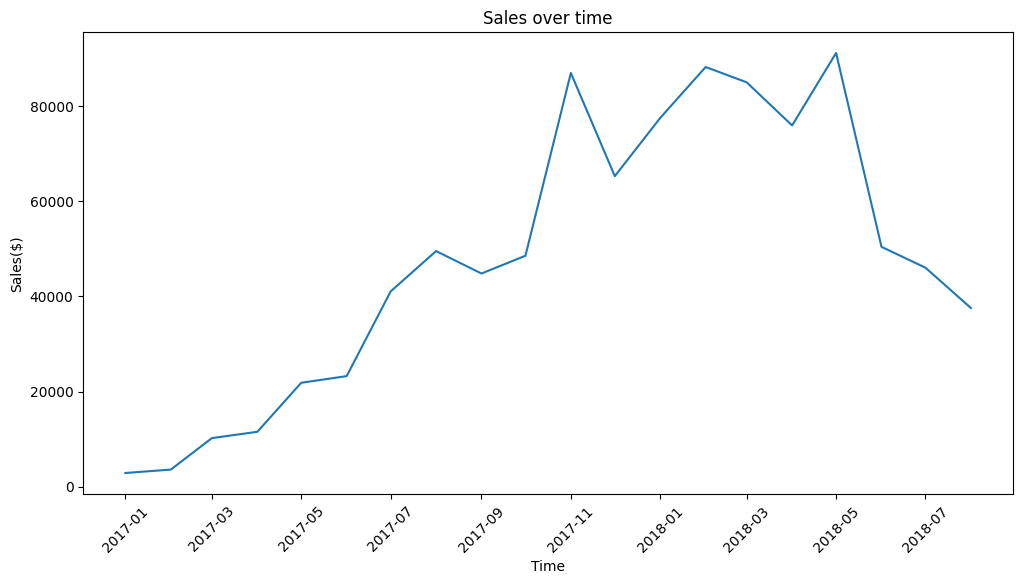

In [267]:
# Create a line graph showing how sales change over time

#Create a datetime variable
price_df['month_year'] = pd.to_datetime(price_df['month_year'], dayfirst=True, errors='coerce')
print(price_df['month_year'].head())
#price_df['month_year_ymd'] = price_df['month_year'].dt.strftime('%Y %m')

# Group total sales by date
sales_df = price_df.groupby('month_year')['total_price'].sum()

# Plot the sales trend
plt.figure(figsize=(12, 6))
plt.plot(sales_df.index,sales_df.values)
plt.xlabel('Time')
plt.ylabel('Sales($)')
plt.xticks(rotation=45)
plt.title('Sales over time')

plt.show()

##### Our sales has fluctuated over time, showing a gradually increase since 2017. Notably, we observed three prominent peaks in total sales, each reaching approximately $85k to $90k, in November 2017, February 2018 and May 2018. Following these peaks, total sales began to decline steadily. 
##### Noting that, we do nat have sufficient data to calculate total sales generated by our competitors.

# Price elasticity
##### Price elasticity provides valuable insights non how customers react to price changes, allowing businesses to make more informed decision on pricing and revenue maximisation strategies

In [268]:
# Calculate % change in price and quantity demanded
price_df['price_change'] = price_df.groupby('product_id')['unit_price'].pct_change()
price_df['quantity_change'] = price_df.groupby('product_id')['qty'].pct_change()

# Calculate price elasticity of demand (%change in quantity/%change in price)
price_df['PED'] = price_df['quantity_change'] / price_df['price_change']

price_df.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
price_df.dropna(subset=['PED'], inplace=True)

# Look into the summary statistics for PED
print(price_df['PED'].describe())

count     297.000000
mean      -40.627233
std       560.604987
min     -8842.508843
25%       -13.475000
50%        -2.981146
75%         6.922692
max      1773.333333
Name: PED, dtype: float64


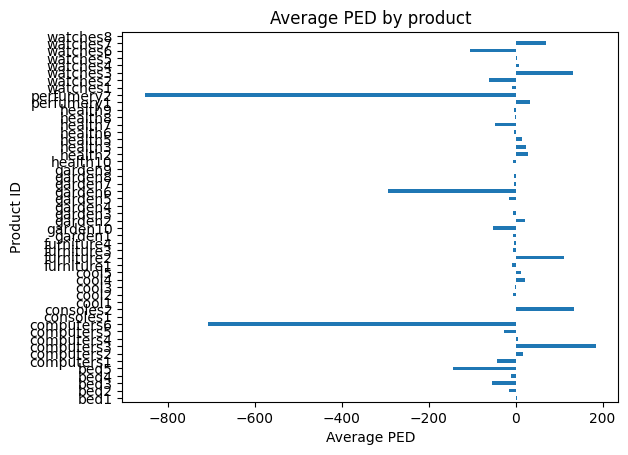

In [269]:
# Calculate the average PED by product id
mean_ped_df = price_df.groupby('product_id')['PED'].mean()
# Generate a horizontal bar chart
mean_ped_df.plot.barh()
plt.title('Average PED by product')
plt.xlabel('Average PED')
plt.ylabel('Product ID')

plt.show()

##### On average, our products exhibit relatively inelastic demand meaning changes in price has little effect on change in quantity demanded.
##### Notably, perfumery2 has the most inelastic demand among all products. However, some products- such as computer3 and consoles2- that show high elastic demand, indicating an increase in price could lead to a drastic decrease in quantity sold and thus sales as consumers may may switch to our competitors.

# Regression model

##### Train a regression model to forecast quantity demanded

In [270]:
# Create independent (x) and dependent (y) variables
# Independent variables include our price, competitors'price 
X = price_df[['unit_price', 'comp_1','comp_2', 'comp_3']]
y = price_df['qty']

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Study coefficient of each variable to understand how each variable impact quantity demanded
print("Coefficient: unit_price, comp_1, comp_2, comp_3, s")
model.coef_



Coefficient: unit_price, comp_1, comp_2, comp_3, s


array([-0.0367144 , -0.00281544,  0.03502999, -0.03143606])

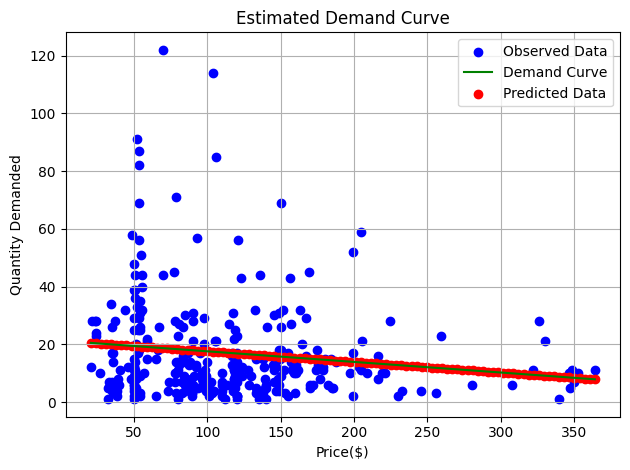

In [271]:
# Create a range of prices to simulate diffent pricing scenarios
price_range = np.linspace(price_df['unit_price'].min(), price_df['unit_price'].max(), 100)

# Fixed competitors' price and seasonality by taking average
comp1_avg = price_df['comp_1'].mean()
comp2_avg = price_df['comp_2'].mean()
comp3_avg = price_df['comp_3'].mean()

# Create new dataframe to store the predicted results
X_pred = pd.DataFrame({
    'unit_price': price_range,
    'comp_1': comp1_avg,
    'comp_2': comp2_avg,
    'comp_3': comp3_avg })

# Predict quantity demanded using a trained linear regression model
qty_predict = model.predict(X_pred)

# Plot the result
plt.scatter(price_df['unit_price'], y, color='blue', label='Observed Data')
plt.plot(price_range, qty_predict, color = 'green', label='Demand Curve')
plt.scatter(price_range, qty_predict, color='red', label='Predicted Data')

plt.xlabel('Price($)')
plt.ylabel('Quantity Demanded')
plt.title('Estimated Demand Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### The estimated demand curve is illustrated in the graph above. The demand curve is downward sloping indicating a negative relationship between price and quantity demanded. The model fit the data moderately well, capturing the overall trend. However, some observed data deviated significantlt from fitted line. This deviations are likely due to market variations, human errors or omitted variables that are not included in the model i.e. marketing campaigns, seasonality

# Sales Forecast

##### Given the predicted quantity demand, calculate estimated sales and find optimal price that maximise sales revenue

In [272]:
# Our predicted average quantity sold 
qty_predict = model.predict(X_pred)

# Our predicted average sales 
predicted_sales = qty_predict * price_range
max_revenue = predicted_sales.max()
max_revenue_idx = np.argmax(predicted_sales)
optimal_price = price_range[max_revenue_idx]

print('Max average sales: ', max_revenue,'Optima price: ',optimal_price)

Max average sales:  3080.7153225831125 Optima price:  291.1717171724242


In [273]:
# Optimal price per productID
# Create new data frame
results_df = pd.DataFrame(columns=['product id', 'Max revenue', 'Optimal price'])

# loop over each product id
for product_id, group in price_df.groupby('product_id'):
    X1 = price_df[['unit_price', 'comp_1','comp_2', 'comp_3']]
    y1 = price_df['qty']

    # Train model on each product ID group
    model1 = LinearRegression()
    model1.fit(X1, y1)
    model1.coef_

    # Create a price range
    price_range1 = np.linspace(group['unit_price'].min(), group['unit_price'].max(), 100)
    
    comp1_avg1 = group['comp_1'].mean()
    comp2_avg1 = group['comp_2'].mean()
    comp3_avg1 = group['comp_3'].mean()
    
    X_pred1 = pd.DataFrame({
    'unit_price': price_range1,
    'comp_1': comp1_avg1,
    'comp_2': comp2_avg1,
    'comp_3': comp3_avg1})

    # Predict quantity
    qty_predict1 = model1.predict(X_pred1)

    # Predict sales for each product group
    predicted_sales1 = qty_predict1 * price_range1
    # Find max revenue and optimal price
    max_revenue1 = predicted_sales1.max()
    max_revenue_idx1 = np.argmax(predicted_sales1)
    optimal_price1 = price_range1[max_revenue_idx1]

    # store the results in created dataframe
    results_df.loc[len(results_df)] = [product_id,max_revenue1,optimal_price1]

# Here is the data showing optimal price for each product and its corresponding expected max revenue
results_df


,product id,Max revenue,Optimal price
0,bed1,793.871303,40.531818
1,bed2,1709.214249,88.488235
2,bed3,1891.959953,98.300000
3,bed4,934.448445,47.900000
4,bed5,3887.553471,209.000000
5,computers1,2059.044676,109.900000
6,computers2,1941.831019,97.642500
7,computers3,2449.209849,149.852500
8,computers4,2654.873122,159.990000
9,computers5,2243.428277,119.900000
